In [84]:
"""
@ importing all needed libraries
"""
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sn
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [93]:
""" removing all the null entries from the data set  """
data_set=pd.read_csv(r"C:\Users\Acer\Desktop\intern\dataset\Lead Scoring.csv")
data_set.isnull().sum()
data_set.dropna(inplace=True)
data_set.isnull().sum()
data_set.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
""" finding the low contribution columns """
thresholder=VarianceThreshold(threshold=0)
numerilcal_column=data_set.select_dtypes(include=["int64","float64"]).columns.tolist()
data=thresholder.fit(data_set[numerilcal_column])


<Axes: >

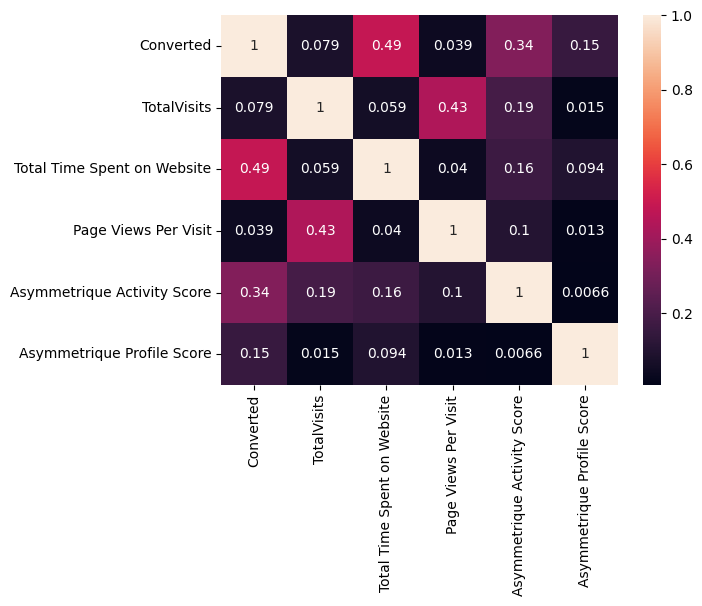

In [44]:
"""
@checking for the corelation between the featuers
"""
x_data=data_set.drop(columns=["Lead Quality","Prospect ID","Lead Number"])
y_data=data_set["Lead Quality"]

x_numerical_columns = x_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
x_categorical_columns = x_data.select_dtypes(include=["object"]).columns.tolist()

corr=data_set[x_numerical_columns ].corr()
sn.heatmap(corr,annot=True)

In [45]:
"""
@ scaling,encoding and transforming the data
"""
y_encoder=LabelEncoder()

transformer=ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),x_numerical_columns),
        ('encoding',OneHotEncoder(handle_unknown='ignore'),x_categorical_columns)
    ]
)

x_preprocessed_data=transformer.fit_transform(x_data)
y_preprocessed_data=y_encoder.fit_transform(y_data)
x_train,x_test,y_train,y_test=train_test_split(x_preprocessed_data,y_preprocessed_data)

In [69]:
"""
@model training and testing
"""
model = SVC(kernel='poly', C=1.0, gamma='scale', random_state=42)
model.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [72]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(round(score,2))

0.67


<Axes: >

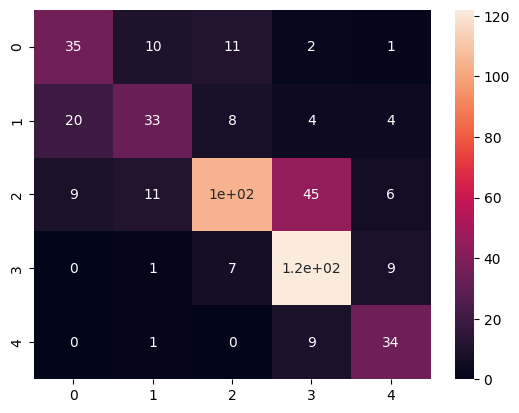

In [97]:
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)